In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import itertools

In [6]:
"""
Brute-force boolean matrix multiplication. Used as a benchmark for testing M4RM.

Parameters:
A, B: binary matricies 

Returns:
C: result of A * B 
"""
def boolean_matrix_multiplication(A, B):
    C = np.zeros((A.shape[0], B.shape[1]), dtype=int)
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] |= (A[i, k] & B[k, j])
    return C

In [ ]:
"""
Multiply two binary matrices using the method of rour russians.

Parameters:
A, B: binary matricies 

Returns:
C: result of A * B 
"""
def four_russians(A, B):
    if A.shape[1] != B.shape[0]:
        raise ValueError(f"Matrix dimensions don't match for multiplication: A is {A.shape}, B is {B.shape}")
    
    # if not np.all(np.logical_or(A == 0, A == 1)) or not np.all(np.logical_or(B == 0, B == 1)):
    if not np.all((A == 0) | (A == 1)) or not np.all((B == 0) | (B == 1)):
        raise ValueError("Input matrices must be binary")
    
    # multiplication is A (n x m) * B (m x p) = C (n x p)
    n = A.shape[0]
    m = A.shape[1]
    p = B.shape[1]
    
    k = max(1, int(np.log2(m))) # optimal value of k
    
    # Initialize result matrix
    C = np.zeros((n, p), dtype=int)
    
    # Process the columns of A and rows of B in blocks of k
    for j in range(0, m, k):
        # Determine the actual block size, if k does not evenly divide m it may be smaller on the final iteration 
        block_size = min(k, m - j)
        
        # Precompute all possible combinations of rows in B_block
        num_combinations = 2**block_size
        row_sums = [np.zeros(p, dtype=int) for _ in range(num_combinations)]
        
        # For each possible combination of rows
        for r in range(1, num_combinations):
            # Determine which rows to include
            for bit in range(block_size):
                if (r >> bit) & 1:
                    row_idx = j + bit
                    if row_idx < m:  # Ensure we don't go out of bounds
                        # row_sums[r] = np.logical_or(row_sums[r], B[row_idx]).astype(int)
                        row_sums[r] = row_sums[r] | B[row_idx]

        
        # For each row in A
        for i in range(n):
            # Extract the relevant block from A
            a_block = A[i, j:j+block_size]
            
            # Convert the block to an index
            idx = 0
            for bit_idx, bit_val in enumerate(a_block):
                if bit_val:
                    idx |= (1 << bit_idx)
            
            # Update the result
            # C[i] = np.logical_or(C[i], row_sums[idx]).astype(int)
            C[i] = C[i] | row_sums[idx]
    
    return C

# Example usage:
n = 100
A = np.random.randint(0, 2, (n, n))
B = np.random.randint(0, 2, (n, n))

result = four_russians(A, B)
expected = ((A @ B) > 0).astype(int)  # Boolean matrix multiplication with 0s and 1s
expected = boolean_matrix_multiplication(A, B)
print(result)
print(expected)
# print(np.linalg.matrix_norm(result))
# print(np.linalg.matrix_norm(expected - result))
# print(np.linalg.matrix_norm(expected - expected))


print(np.equal(result, expected))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

True
True
True
True
True
True
True
True
True
True


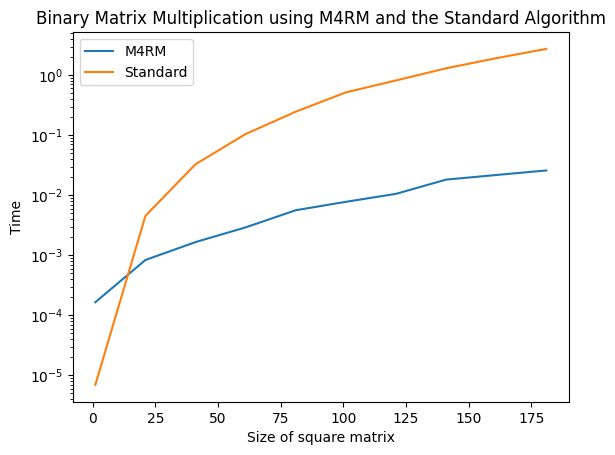

In [25]:
def test_four_russians():
    time_four_russians = {}
    f4 = []
    t = []
    idx = []
    time_standard = {}
    n = 1
    while n < 200:
        idx.append(n)
        A = np.random.randint(0, 2, (n, n))
        B = np.random.randint(0, 2, (n, n))

        start = time.time()
        result1 = four_russians(A, B)
        end = time.time()
        f4.append(end - start)
        time_four_russians[n] = end - start

        start = time.time()
        result2 = boolean_matrix_multiplication(A, B)
        end = time.time()
        t.append(end - start)
        time_standard[n] = end - start
        print(np.array_equal(result1, result2))
        n += 20

    plt.plot(idx, f4, label='M4RM')
    plt.plot(idx, t, label='Standard')

    plt.xlabel("Size of square matrix")
    plt.ylabel("Time")

    plt.title("Binary Matrix Multiplication using M4RM and the Standard Algorithm")
   
    # plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
test_four_russians()